In [170]:
using LinearAlgebra #Manipulacion de Matrices
#using Gadfly  
using Plots #Graficacion
using StaticArrays 
using SparseArrays 
using Arpack  #Obtencion de Eigenvalores
using JeszenszkiBasis #Generar una base
#Variables globales N,M,D
global N=6
global M=6
global D=Int((factorial(M+N-1))/(factorial(M-1)*factorial(N))) 
#funcion primos 
p(i)=100i+3
#Generamos la base en orden lexicografico para N=M=5
v = Szbasis(M, N)  

Szbasis(6, 6, 462, [6 5 … 0 0; 0 1 … 0 0; … ; 0 0 … 1 0; 0 0 … 5 6])

In [171]:
function tag(b,M)
    tag=0;
    for i in 1:M
        tag += (√p(i))*b[i] 
    end
    return tag 
end

tag (generic function with 1 method)

In [172]:
function creation_ann(k,j,v)     
    if(v[j] >= 1) 
        b = copy(v)
        value = sqrt(((b[k])+1)*b[j])
        b[j] -= 1; 
        b[k] += 1;    
        return [value , b]   
    else 
        return 0; 
    end 
end   

creation_ann (generic function with 1 method)

In [173]:
function matrixofcreationann(i,k)
    mat = spzeros(D,D)
    for j in 1:D 
        if(creation_ann(i,k,v[j])==0) 
            continue
        end
        mat[DictOfInds[tag(creation_ann( i, k , v[j] )[2],M)], j] = creation_ann(i, k , v[j])[1] 
    end   
    return rot180(mat) 
end

matrixofcreationann (generic function with 1 method)

In [174]:
#Valores de la diagonal de los numeros de ocupacion
function valdiags(k, v, M)  
    if(v[k] >= 1)  
        return  (v[k]*(v[k]-1))/2  
    else 
        return 0;
    end  
end       

valdiags (generic function with 1 method)

In [175]:
#Array de tags 
T = []
for i in 1:length(v) 
     push!(T,  tag( v[i] , M )) 
end

In [176]:
#Ordenamos y hacemos un diccionario Tsorted => indices
inds = sortperm(T);
Tsorted = T[inds];
#DictOfInds = Dict(zip(Tsorted, inds)) 
DictOfInds = Dict(Tsorted .=> inds)

Dict{Float64, Int64} with 462 entries:
  80.4301 => 91
  107.049 => 132
  103.035 => 274
  104.441 => 28
  87.6881 => 96
  115.229 => 172
  69.0912 => 3
  114.307 => 135
  105.078 => 257
  130.801 => 452
  106.509 => 252
  85.3353 => 40
  126.744 => 370
  140.951 => 441
  111.53  => 293
  104.333 => 229
  95.7951 => 216
  138.823 => 406
  120.134 => 139
  114.689 => 295
  107.674 => 159
  116.975 => 138
  138.374 => 451
  109.244 => 376
  113.501 => 168
  ⋮       => ⋮

Any[15.0, 10.0, 7.0, 6.0, 7.0, 10.0, 15.0, 10.0, 6.0, 4.0, 4.0, 6.0, 10.0, 7.0, 4.0, 3.0, 4.0, 7.0, 6.0, 4.0, 4.0, 6.0, 7.0, 6.0, 7.0, 10.0, 10.0, 15.0, 10.0, 6.0, 4.0, 4.0, 6.0, 10.0, 6.0, 3.0, 2.0, 3.0, 6.0, 4.0, 2.0, 2.0, 4.0, 4.0, 3.0, 4.0, 6.0, 6.0, 10.0, 7.0, 4.0, 3.0, 4.0, 7.0, 4.0, 2.0, 2.0, 4.0, 3.0, 2.0, 3.0, 4.0, 4.0, 7.0, 6.0, 4.0, 4.0, 6.0, 4.0, 3.0, 4.0, 4.0, 4.0, 6.0, 7.0, 6.0, 7.0, 6.0, 6.0, 7.0, 10.0, 10.0, 10.0, 15.0, 10.0, 6.0, 4.0, 4.0, 6.0, 10.0, 6.0, 3.0, 2.0, 3.0, 6.0, 4.0, 2.0, 2.0, 4.0, 4.0, 3.0, 4.0, 6.0, 6.0, 10.0, 6.0, 3.0, 2.0, 3.0, 6.0, 3.0, 1.0, 1.0, 3.0, 2.0, 1.0, 2.0, 3.0, 3.0, 6.0, 4.0, 2.0, 2.0, 4.0, 2.0, 1.0, 2.0, 2.0, 2.0, 4.0, 4.0, 3.0, 4.0, 3.0, 3.0, 4.0, 6.0, 6.0, 6.0, 10.0, 7.0, 4.0, 3.0, 4.0, 7.0, 4.0, 2.0, 2.0, 4.0, 3.0, 2.0, 3.0, 4.0, 4.0, 7.0, 4.0, 2.0, 2.0, 4.0, 2.0, 1.0, 2.0, 2.0, 2.0, 4.0, 3.0, 2.0, 3.0, 2.0, 2.0, 3.0, 4.0, 4.0, 4.0, 7.0, 6.0, 4.0, 4.0, 6.0, 4.0, 3.0, 4.0, 4.0, 4.0, 6.0, 4.0, 3.0, 4.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 6.0, 7

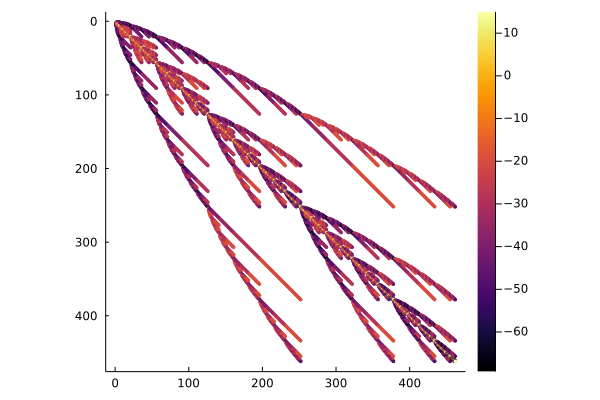

In [177]:
#for t in 1:10
#    J=10
#    U=t*J*0.1 
#obtener H_int 
diagscomp = [];
for j in 1:D 
    sumsdeocup = []; 
    for k in 1:M
        push!(sumsdeocup, valdiags(k, v[j], M))
    end  
    push!(diagscomp, sum(sumsdeocup))    
end   
#Mostramos la parte  
println(diagscomp)
Hint = spzeros(D,D)
Hint[diagind(Hint)] = diagscomp; Hint 
#println(Hint)
#Hint=diagm(diagscomp) 
#spy(Hint) 
J = 20
Hkin = spzeros(D,D)
#firstcolumn = [] 
for j in 1:D
    for k in 1:M 
        for h in 1:M   
            if k == h 
                break 
            elseif creation_ann(k,h,v[j]) == 0 
                continue 
            else 
                 Hkin[DictOfInds[tag(creation_ann( k, h , v[j] )[2],M)], j] = -J*(creation_ann( k, h , v[j])[1])     
            end
        end 
    end  
end  
Hkin = Symmetric(Hkin, :L)
#println(Hkin)  
#spy(Hkin)
#end    
H=rot180(Hkin+Hint) 
#H=Hkin+Hint
spy(H, markersize = 2)

In [178]:
Eval, Evec = eigs(H , nev=2 , which=:SR)

([-597.5086092014258, -476.6837944040481], [0.0043962982353023036 0.01818451349967264; 0.010993189604787105 0.04067486215842118; … ; 0.010993189604786974 -0.000982487845812688; 0.004396298235302272 0.00040149404796232575], 2, 2, 38, [-4.190469542055345, 2.128152182386111, -9.754431875584173, -6.231250351392826, 1.7384726252392009, -5.637026869203285, 0.43738051997853067, 3.3480103945857094, -2.2718318606238737, 2.386274579638775  …  -3.990103863738438, -1.3576979632756279, -2.6812243693576994, -3.420021162399542, 2.125486921533278, 0.500906643068759, -0.9031041368646117, 1.0810260448901898, 1.5196309265486936, -7.556750963701779])

In [179]:
H

462×462 SparseMatrixCSC{Float64, Int64} with 8021 stored entries:
⢿⣷⢶⣤⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠘⣷⣿⣿⣶⠙⢿⠶⣤⣀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠙⣜⠛⠛⣤⣤⣑⠈⠛⠓⢤⣤⣀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⢻⡗⢄⢻⣿⣿⠻⣶⣄⠀⠙⢍⠻⣶⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⢻⣦⠀⢻⣦⢿⣷⣦⠀⠀⠀⠑⢄⠀⠙⢷⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠙⣄⠀⠙⠈⠛⠛⣤⣤⣀⠀⠀⠑⠀⠀⠑⠙⠳⣤⣄⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⢻⡗⢄⠀⠀⠀⢻⣿⣿⠻⣶⣄⠀⠀⠀⠀⠀⠈⠻⣍⠳⣦⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⢻⣦⠑⢄⠀⠀⢻⣦⢿⣷⣦⠙⢷⣦⡀⠀⠀⠀⠈⠳⣄⠈⠻⣷⣄⡀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠙⣄⠀⠑⠀⠀⠙⣌⠛⠛⣤⣄⡑⠙⠓⠀⠀⠀⠀⠈⠳⣄⠈⠓⠙⠲⣤⣀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠹⣷⢄⠀⠀⠀⠹⣷⢄⠹⣿⣿⢦⣄⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠈⠻⣷⣦⡀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⢷⡀⠀⠀⠀⠈⢷⠀⠈⢷⠻⣦⣀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠈⠳⡝⢷⣄
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢿⣦⡀⠀⠀⠀⠀⠀⠀⠀⠘⣿⣿⣶⣤⣀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⢧⡙⢦⡀⠀⠀⠀⠀⠀⠀⠘⣿⡻⣮⣏⡓⢦⣄⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⢿⡀⠙⢦⡀⠀⠀⠀⠀⠀⠘⢯⠹⡿⣯⡀⠙⢝⢶⣄⡀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢿⣦⡀⠙⢦⡀⠀⠀⠀⠀⠈⢷⣄⠈⢿⣷⣦⣀⠈⠻⣷⢤⡀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠹⣝⠀⠀⠙⢦⡀⠀⠀⠀⠈⢳⣕⠈⢻⣿⣿⡓⠀⠈⠳⣝⠳⣄⡀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⣦⡀⠀⠀⠙⠀⠀⠀⠀⠀⠹⣦⡀⠙⠈⢻⣶⣤⡀⠈⠃⠈⠛
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⢿⣦⡀⠀⠀⠀⠀⠀⠀⠀⠙⣟⢦⡀⠀⠻⣿⣿⣶⣄⡀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣝⠦⠀⠀⠀⠀⠀⠀⠀⠈⢷⡙⠦⠀⠘⢿⡿⣯⡻⠦
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢷⠀⠀⠀⠀⠀⠀⠀⠀⠀⠹⣦⠀⠀⠈⠻⡎⢻⣶

In [180]:
G = Evec[:,1] 

462-element Vector{Float64}:
 0.0043962982353023036
 0.010993189604787105
 0.01099318960478706
 0.010993189604787084
 0.010993189604787049
 0.010993189604787028
 0.017598282706236527
 0.024991499197681982
 0.02499149919768194
 0.024991499197681944
 0.02499149919768196
 0.01759828270623645
 0.024991499197681864
 ⋮
 0.024991499197681743
 0.03563683296789553
 0.03563683296789549
 0.024991499197681823
 0.010993189604787044
 0.004396298235302053
 0.010993189604787037
 0.017598282706236378
 0.020404776743029696
 0.017598282706236434
 0.010993189604786974
 0.004396298235302272

In [181]:
SPDM = spzeros(M,M) 
for k in 1:M 
    for h in 1:M   
        if k == h 
            break 
        else  
            t = matrixofcreationann(k,h)*G
            SPDM[k , h] = dot(G,t)  
        end
    end  
end  
SPDM = Symmetric(SPDM, :L)

6×6 Symmetric{Float64, SparseMatrixCSC{Float64, Int64}}:
 0.0       0.999986  0.999986  0.999986  0.999986  0.999986
 0.999986  0.0       0.999986  0.999986  0.999986  0.999986
 0.999986  0.999986  0.0       0.999986  0.999986  0.999986
 0.999986  0.999986  0.999986  0.0       0.999986  0.999986
 0.999986  0.999986  0.999986  0.999986  0.0       0.999986
 0.999986  0.999986  0.999986  0.999986  0.999986  0.0

In [182]:
EvalSPDM, EvecSPDM = eigs(SPDM , nev=1)

([4.999928843210271], [-0.40824829046386313; -0.4082482904638629; … ; -0.40824829046386313; -0.4082482904638629], 1, 1, 6, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

In [183]:
EvalSPDM

1-element Vector{Float64}:
 4.999928843210271

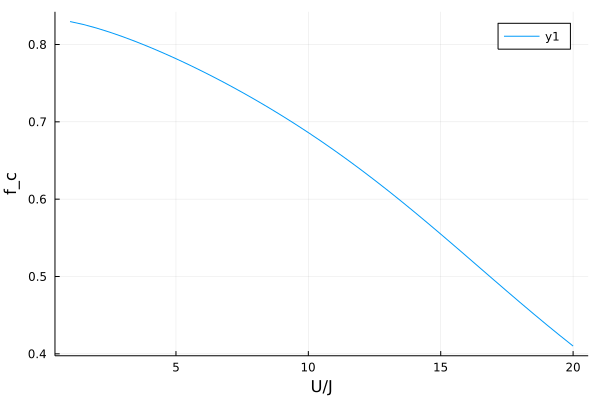

In [186]:
fconde = Vector{Float64}()
for t in 1:0.5:20
    J=10
    U=t*J
    diagscomp = [];
    for j in 1:D 
        sumsdeocup = []; 
        for k in 1:M
        push!(sumsdeocup, valdiags(k, v[j], M))
        end  
        push!(diagscomp, sum(sumsdeocup))    
    end    
    Vals = U*diagscomp
    Hint = spzeros(D,D)
    Hint[diagind(Hint)] = Vals; Hint 
    Hkin = spzeros(D,D)
    firstcolumn = [] 
    for j in 1:D
        for k in 1:M 
            for h in 1:M   
                if k == h 
                    break 
                elseif creation_ann(k,h,v[j]) == 0 
                    continue 
                else 
                     Hkin[DictOfInds[tag(creation_ann( k, h , v[j] )[2],M)], j] = -J*(creation_ann( k, h , v[j])[1])     
                end
            end 
        end  
    end  
    Hkin = Symmetric(Hkin, :L)  
    H=rot180(Hkin+Hint)  
    Eval, Evec = eigs(H,nev=2,which=:SR, v0 = ones(D))   
    G = Evec[:,1]
    SPDM = spzeros(M,M) 
    for k in 1:M 
        for h in 1:M   
            if k == h 
                break 
            else  
                t = matrixofcreationann(k,h)*G
                SPDM[k , h] = dot(G,t)  
            end
        end  
    end   
    SPDM = Symmetric(SPDM, :L) 
    EvalSPDM, EvecSPDM = eigs(SPDM , nev=1)    
    push!(fconde, real(EvalSPDM[1])/N)  
end       
t = 1:0.5:20
plot(t,fconde, xlabel = "U/J", ylabel= "f_c")


In [188]:
matrixofcreationann(1,2)

462×462 SparseMatrixCSC{Float64, Int64} with 252 stored entries:
⠐⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠈⠓⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠱⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠓⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠱⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠓⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠓⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠱⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠳⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠓⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠑⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠳⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠓⢄⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠳⣄⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⢄⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄

In [362]:
creation_ann(2,3,v[10])

2-element Vector{Any}:
 1.7320508075688772
  [0, 1, 2]

In [357]:
v[9]

3-element view(::Matrix{Int64}, :, 9) with eltype Int64:
 0
 1
 2